<a href="https://colab.research.google.com/github/abhireddy2268/ADM_FINAl_PROJECT1/blob/main/admprojetc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [6]:
import kagglehub
ronikdedhia_ipl_first_innings_score_path = kagglehub.dataset_download('ronikdedhia/ipl-first-innings-score')
print('Data source import complete.')

Data source import complete.


In [7]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ipl-first-innings-score/ipl.csv


In [5]:
df = pd.read_csv('/content/ipl.csv')
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [8]:
print("Dimensions : ",df.shape) #tells us abt rows,columns
df.dtypes #tells the data type of the items

Dimensions :  (76014, 15)


,0
mid,int64
date,object
venue,object
bat_team,object
bowl_team,object
batsman,object
bowler,object
runs,int64
wickets,int64
overs,float64


In [9]:
df.drop(labels=['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker'], axis=1, inplace=True)
print('After removing unwanted columns: {}'.format(df.shape))

After removing unwanted columns: (76014, 9)


In [11]:
df['bat_team'].unique() #prints the unique teams

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [12]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [13]:
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))] #removes the inconsistents teams
print('After removing inconsistent teams: {}'.format(df.shape))

After removing inconsistent teams: (53811, 9)


In [14]:
df['bat_team'].unique() #unique teams in for battings

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [15]:
df = df[df['overs']>=5.0] #removes teams teams overs having less then 5
print('After removing first 5 overs data: {}'.format(df.shape))

After removing first 5 overs data: (40108, 9)


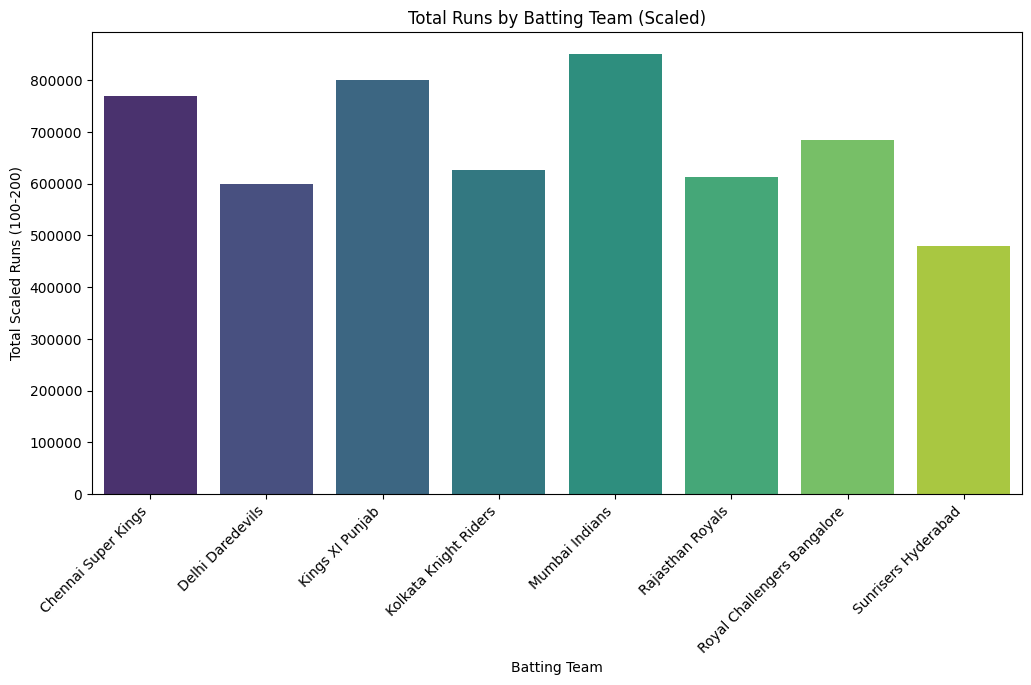

In [16]:
scaler = MinMaxScaler(feature_range=(100, 200)) #it is done to normalize the data
df['scaled_runs'] = scaler.fit_transform(df[['runs']]) #those scaled values are put on new column called sacled_runs
total_scaled_runs = df.groupby('bat_team')['scaled_runs'].sum().reset_index() #calculating total run for each team reset is used to clean data frame
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=total_scaled_runs, x='bat_team', y='scaled_runs', ci=None, palette='viridis') #using total_scaled_runs and adding color palette
plt.title('Total Runs by Batting Team (Scaled)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Batting Team')
plt.ylabel('Total Scaled Runs (100-200)')

# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.0f'),
#                 (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='bottom',  # Changed vertical alignment for better readability
#                 xytext=(0, 5), textcoords='offset points', fontsize=10, color='black') # Added color and adjusted position

plt.show()

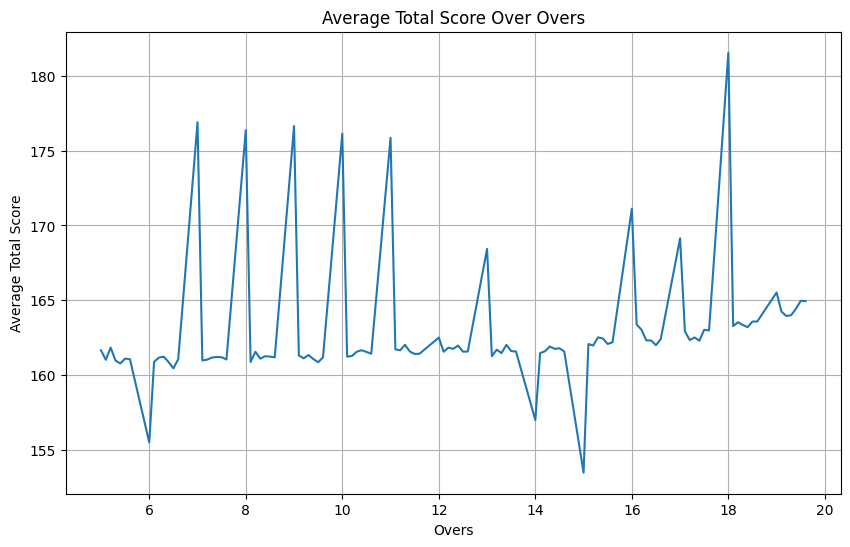

In [17]:
plt.figure(figsize=(10,6)) #graph or line plot between overs and total runs
sns.lineplot(data=df, x='overs', y='total', estimator='mean', ci=None) #here estimator is used for taking the mean of total score for each over
plt.title('Average Total Score Over Overs')
plt.xlabel('Overs')
plt.ylabel('Average Total Score')
plt.grid(True) #for background grid
plt.show()

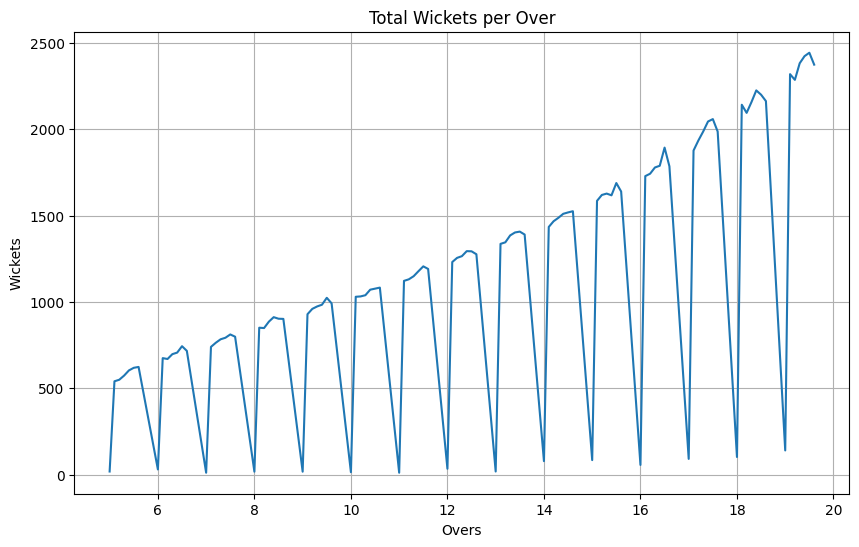

In [18]:
plt.figure(figsize=(10,6)) #graph or line plot between overs and wickets
sns.lineplot(data=df, x='overs', y='wickets', estimator='sum', ci=None) #here estimator is used for taking the sum of to wickets for each over
plt.title('Total Wickets per Over')
plt.xlabel('Overs')
plt.ylabel('Wickets')
plt.grid(True)
plt.show()

In [19]:
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d')) #data column in converted into class object for future uses in plotting
print("After converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))

After converting 'date' column from string to datetime object: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [20]:
#it cannot handle labels so it converts them into binary numbers 1 for present and 0 for not present for bowling and batting
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])
encoded_df.columns #printing those columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'scaled_runs', 'bat_team_Chennai Super Kings',
       'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

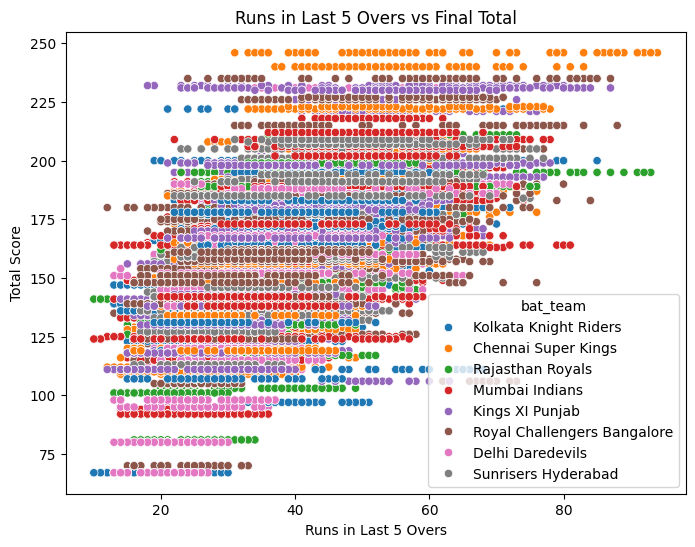

In [21]:
plt.figure(figsize=(8,6)) #plot of runs scored in last 5 overs and final total score
sns.scatterplot(data=df, x='runs_last_5', y='total', hue='bat_team') #hue is used for plotting of each team in diff color
plt.title('Runs in Last 5 Overs vs Final Total')
plt.xlabel('Runs in Last 5 Overs')
plt.ylabel('Total Score')
plt.show()

In [22]:
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]
#changing the old encoded_df with a new order provided

In [23]:
print(df.columns.tolist()) #after encoding,dropping and changes it prints the columns in order

['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total', 'scaled_runs']


In [24]:
#here we are spliting the data into testing and training using date
#using matchs upto 2016 as training and after 2017 for testing and dropping total(final score) as it is not needed
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]
#we are taking values from total for predicting the values for Y_trian,y_test
y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values
#removing the date from x-testing,training as they are not needed for plot
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)
print("Training set : {} and Test set : {}".format(X_train.shape, X_test.shape))

Training set : (37330, 21) and Test set : (2778, 21)


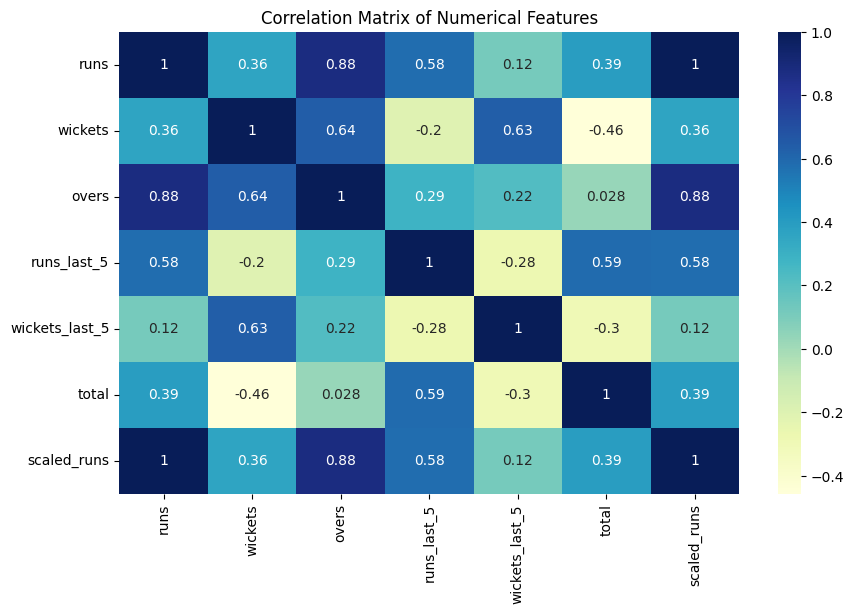

In [25]:
plt.figure(figsize=(10,6)) #this is to plot heatmap btw numeric columns
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu') #annot is used to print values inside the square
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [26]:
linear_regressor = LinearRegression() #creating linear rergression model
linear_regressor.fit(X_train,y_train) #training model using x_train and y_train

LinearRegression()

In [27]:
y_pred_lr = linear_regressor.predict(X_test) #predicting on x_test

In [28]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("Mean Absolute Error: {}".format(mae(y_test, y_pred_lr))) #to measure the avg magnitude of errors
print("Mean Squared Error: {}".format(mse(y_test, y_pred_lr))) #magnifies the big mistakes or errors
print("Root Mean Squared Error: {}".format(np.sqrt(mse(y_test, y_pred_lr)))) #puts back the original units(runs)

Mean Absolute Error: 12.118617546193299
Mean Squared Error: 251.00792310417438
Root Mean Squared Error: 15.843229566732106


In [29]:
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor() ##creating decision tree rergression model
decision_regressor.fit(X_train,y_train) #training model using x_train and y_train

DecisionTreeRegressor()

In [30]:
y_pred_dt = decision_regressor.predict(X_test) #predicting x values using decision tree regression

In [31]:
print("Mean Absolute Error : {}".format(mae(y_test, y_pred_dt)))
print("Mean Squared Error : {}".format(mse(y_test, y_pred_dt)))
print("Root Mean Squared Error : {}".format(np.sqrt(mse(y_test, y_pred_dt))))

Mean Absolute Error : 17.641108711303097
Mean Squared Error : 555.3099352051836
Root Mean Squared Error : 23.565015069063367


In [33]:
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor() #creating random forest rergression model
random_regressor.fit(X_train,y_train) #training model using x_train and y_train

RandomForestRegressor()

In [34]:
y_pred_rf = random_regressor.predict(X_test) #predicting x values using random forest regression

In [35]:
print("Mean Absolute Error : {}".format(mae(y_test, y_pred_rf)))
print("Mean Squared Error : {}".format(mse(y_test, y_pred_rf)))
print("Root Mean Squared Error : {}".format(np.sqrt(mse(y_test, y_pred_rf))))

Mean Absolute Error : 13.826069054475642
Mean Squared Error : 331.71181106688465
Root Mean Squared Error : 18.212957230139335


In [36]:
#predicting the final score of teams IPL match batting&bowling with conditions
#we use one-hot encoded vector for the batting team—only the matching team gets a 1,others get 0.8-teams so 8-binary codes
#one-hot encoding tells the model exactly which team is playing,without implying any order or ranking
def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
  temp_array = list()
  if batting_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  if bowling_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5] #this is numerical features --> current runs,wickets lost,runs and wickets in last 5 overs
  temp_array = np.array([temp_array]) #converting list to array
  return int(linear_regressor.predict(temp_array)[0]) #makes prediction usiing linear regression model nad returns predicted final score as integer

Prediction 1 <br/>
• Date: 16th April 2018<br/>
• IPL : Season 11<br/>
• Match number: 13<br/>
• Teams: Kolkata Knight Riders vs. Delhi Daredevils<br/>
• First Innings final score: 200/9<br/>

In [37]:
#using the previous function for prediction of KKR vs DD
final_score = predict_score(batting_team='Kolkata Knight Riders', bowling_team='Delhi Daredevils', overs=9.2, runs=79, wickets=2, runs_in_prev_5=60, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 159 to 174


Prediction 2<br/>
• Date: 7th May 2018<br/>
• IPL : Season 11<br/>
• Match number: 39<br/>
• Teams: Sunrisers Hyderabad vs. Royal Challengers Bangalore<br/>
• First Innings final score: 146/10<br/>

In [38]:
final_score = predict_score(batting_team='Sunrisers Hyderabad', bowling_team='Royal Challengers Bangalore', overs=10.5, runs=67, wickets=3, runs_in_prev_5=29, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 138 to 153


Prediction 3<br/>
• Date: 17th May 2018<br/>
• IPL : Season 11<br/>
• Match number: 50<br/>
• Teams: Mumbai Indians vs. Kings XI Punjab<br/>
• First Innings final score: 186/8<br/>

In [39]:
final_score = predict_score(batting_team='Mumbai Indians', bowling_team='Kings XI Punjab', overs=14.1, runs=136, wickets=4, runs_in_prev_5=50, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 180 to 195


Prediction 4<br/>
• Date: 30th March 2019<br/>
• IPL : Season 12<br/>
• Match number: 9<br/>
• Teams: Mumbai Indians vs. Kings XI Punjab<br/>
• First Innings final score: 176/7<br/>

In [40]:
final_score = predict_score(batting_team='Mumbai Indians', bowling_team='Kings XI Punjab', overs=12.3, runs=113, wickets=2, runs_in_prev_5=55, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 179 to 194


Prediction 5<br/>
• Date: 11th April 2019<br/>
• IPL : Season 12<br/>
• Match number: 25<br/>
• Teams: Rajasthan Royals vs. Chennai Super Kings<br/>
• First Innings final score: 151/7<br/>

In [41]:
final_score = predict_score(batting_team='Rajasthan Royals', bowling_team='Chennai Super Kings', overs=13.3, runs=92, wickets=5, runs_in_prev_5=27, wickets_in_prev_5=2)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 128 to 143


Prediction 6<br/>
• Date: 14th April 2019<br/>
• IPL : Season 12<br/>
• Match number: 30<br/>
• Teams: Sunrisers Hyderabad vs. Delhi Daredevils<br/>
• First Innings final score: 155/7<br/>

In [42]:
final_score = predict_score(batting_team='Delhi Daredevils', bowling_team='Sunrisers Hyderabad', overs=11.5, runs=98, wickets=3, runs_in_prev_5=41, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 157 to 172


Prediction 7<br/>
• Date: 10th May 2019<br/>
• IPL : Season 12<br/>
• Match number: 59 (Eliminator)<br/>
• Teams: Delhi Daredevils vs. Chennai Super Kings<br/>
• First Innings final score: 147/9<br/>

In [43]:
final_score = predict_score(batting_team='Delhi Daredevils', bowling_team='Chennai Super Kings', overs=10.2, runs=68, wickets=3, runs_in_prev_5=29, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 137 to 152


In [ ]:
#this is predicting the score in a dynamic way by entering values manualling
def predict_score_dynamic():
  batting_team = input("Enter the batting team: ")
  bowling_team = input("Enter the bowling team: ")
  overs = float(input("Enter the number of overs: "))
  runs = int(input("Enter the current runs: "))
  wickets = int(input("Enter the current wickets: "))
  runs_in_prev_5 = int(input("Enter runs scored in the last 5 overs: "))
  wickets_in_prev_5 = int(input("Enter wickets lost in the last 5 overs: "))
  temp_array = list()
  teams = ['Chennai Super Kings', 'Delhi Daredevils', 'Kings XI Punjab',
           'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals',
           'Royal Challengers Bangalore', 'Sunrisers Hyderabad']
  batting_team_index = teams.index(batting_team)
  batting_team_encoding = [0] * len(teams)
  batting_team_encoding[batting_team_index] = 1
  temp_array.extend(batting_team_encoding)
  bowling_team_index = teams.index(bowling_team)
  bowling_team_encoding = [0] * len(teams)
  bowling_team_encoding[bowling_team_index] = 1
  temp_array.extend(bowling_team_encoding)
  temp_array.extend([overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5])
  temp_array = np.array([temp_array])
  predicted_score = int(linear_regressor.predict(temp_array)[0])
  print("The final predicted score (range): {} to {}".format(predicted_score - 10, predicted_score + 5))
predict_score_dynamic()